In [1]:
from diags import Conventional
import numpy as np
import pandas as pd
from filter_df import filter_df
from make_da_plots import make_base_plots, make_wind_base_plots
import time_series as time_series
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

/lfs5/BMC/wrfruc/gge/miniconda3/4.6.14/envs/eva/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
pd.set_option('display.max_columns', None) # so I can see all columns on the df

# Filter dataframe returned by PyGSI

## Read diag files

In [4]:
#temperature diag files
diag_t_ges_fp = '../example_data/diag_conv_t_ges.2024031812.nc4'
diag_t_anl_fp = '../example_data/diag_conv_t_anl.2024031812.nc4'

#wind diag files
diag_uv_ges_fp = '../example_data/diag_conv_uv_ges.2024031812.nc4'
diag_uv_anl_fp = '../example_data/diag_conv_uv_anl.2024031812.nc4'

In [5]:
#Temperature Diag file
diag_t_ges = Conventional(diag_t_ges_fp)
diag_t_anl = Conventional(diag_t_anl_fp)

#Wind Diag file
diag_uv_ges = Conventional(diag_uv_ges_fp)
diag_uv_anl = Conventional(diag_uv_anl_fp)

## Query data

In [6]:
df_t_ges = diag_t_ges.get_data()
df_t_anl = diag_t_anl.get_data()

df_uv_ges = diag_uv_ges.get_data()
df_uv_anl = diag_uv_anl.get_data()

In [7]:
df_t_anl['station_id'][0]

'NLOYR3BA'

In [8]:
# for col in df_t_anl.columns:
#     # Check if all elements in the column are equal between _anl and _ges
#     if not (df_anl[col] == df_ges[col]).all():
#         print(f"Column '{col}' is different.")

## Testing PyGSI filter_obs function

### Set filter arguments

In [9]:
elv_range = (0,20)
p_range = (500,1000)
err_range = (0, 4)
station_ids = ['NLOYR3BA']

# Lat and lon ranges for colorado
co_lats = (37, 41)
co_lons = (360-109, 360-102) #to convert from deg west to deg east

In [10]:
#testing station_id filter
# df_anl_fil = filter_df(df_anl, station_ids=station_ids)
# df_ges_fil = filter_df(df_ges, station_ids=station_ids)

In [11]:
# temp examples
# fil_t_dfs = filter_df([df_t_anl, df_t_ges], obs_types= [187], hem='CONUS')
fil_t_dfs = filter_df([df_t_anl, df_t_ges], obs_types= [187], lat_range=co_lats,
                       lon_range=co_lons)

df_t_anl_fil = fil_t_dfs[0]
df_t_ges_fil = fil_t_dfs[1]
print(len(df_t_anl_fil))
print(len(df_t_ges_fil))

89
89


In [12]:
# wind examples
# fil_uv_dfs = filter_df([df_uv_anl, df_uv_ges], obs_types= [287], hem='CONUS')
fil_uv_dfs = filter_df([df_uv_anl, df_uv_ges], obs_types= [287], lat_range=co_lats, lon_range=co_lons)

df_uv_anl_fil = fil_uv_dfs[0]
df_uv_ges_fil = fil_uv_dfs[1]
print(len(df_uv_anl_fil))
print(len(df_uv_ges_fil))

91
91


## Testing base plots

In [13]:
# diag_ges.metadata

In [14]:
# date = diag_ges.metadata['Date']
# date_str = date.strftime('%Y%m%d%H')
# date_str

### Testing non wind

In [15]:
# base_plots(df_t_anl_fil, df_t_ges_fil, diag_t_ges.metadata, save_plots=True)

In [16]:
# base_plots(df_t_anl_fil, df_t_ges_fil, diag_t_ges.metadata)

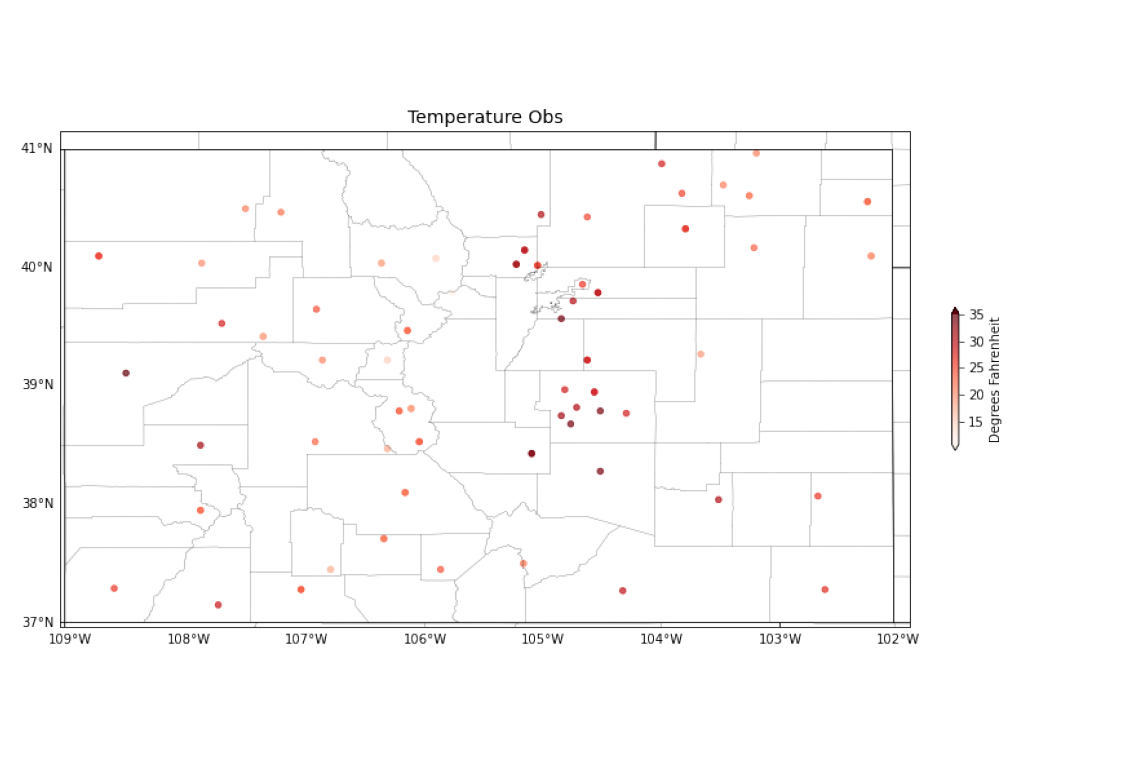

In [17]:
map_img = plt.imread('t_2024031812_plots/Temperature_obs_map.png')
plt.figure(figsize = (20,15))
plt.imshow(map_img)
plt.axis('off')
plt.show()

### Testing wind

In [18]:
# wind_base_plots(df_uv_anl_fil, df_uv_ges_fil, diag_uv_ges.metadata, save_plots=True)

In [19]:
# wind_base_plots(df_uv_anl_fil, df_uv_ges_fil, diag_uv_ges.metadata)

In [20]:
map_img = plt.imread('wind_2024031812_plots/wind_uv_speed_maps.png')
plt.figure(figsize = (15,10))
plt.imshow(map_img)
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'wind_2024031812_plots/wind_uv_speed_maps.png'

# Exploring time series plots

In [2]:
# Get the yesterdays date
today = datetime.today()
yesteryesterday = today - timedelta(days=1)

# Format date
date = yesteryesterday.strftime('%Y%m%d')
print(date)

20240709


In [3]:
rrfs_data_fp = "/lfs4/BMC/nrtrr/NCO_dirs/v0.8.8/com/prod/"
rtma_data_fp = "/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS." + date

## Dataframe for reference

In [2]:
# test_hr = '20'
# test_fp = f"{rtma_data_fp}/{test_hr}/diag_conv_t_anl.{date}{test_hr}.nc4.gz"
# test_df = Conventional(test_fp).get_data()

In [2]:
# station_ids = ['G4CUISJA']
station_ids = None
obs_types = None
path = '/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod'

# Get a list of strings with all hours of day
var = 't'
s_time = '2024070800'
f_time = '2024071012'

FileNotFound: /lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.20240709/13/diag_conv_t_ges.2024070913.nc4.gz
FileNotFound: /lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.20240709/14/diag_conv_t_ges.2024070914.nc4.gz
FileNotFound: /lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.20240709/15/diag_conv_t_ges.2024070915.nc4.gz
FileNotFound: /lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.20240709/16/diag_conv_t_ges.2024070916.nc4.gz
FileNotFound: /lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.20240709/17/diag_conv_t_ges.2024070917.nc4.gz
FileNotFound: /lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.20240709/18/diag_conv_t_ges.2024070918.nc4.gz
FileNotFound: /lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.20240709/19/diag_conv_t_ges.2024070919.nc4.gz
FileNotFound: /lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.20240709/20/diag_conv_t_ges.2024070920.nc4.gz
FileNotFound: /lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA

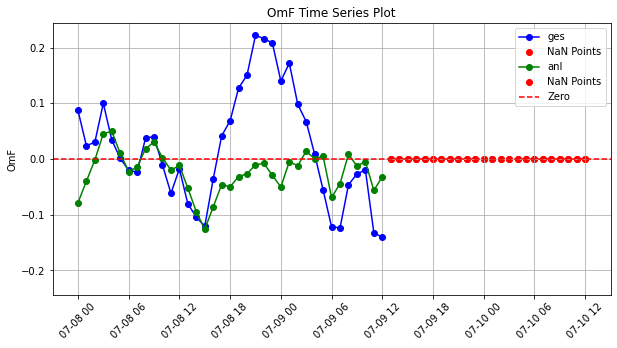

In [4]:
time_series.plot_time_series(path, var, anl_ges='both', s_time=s_time, f_time=f_time)